In [2]:
from qiskit_nature.second_q.hamiltonians import FermiHubbardModel
from qiskit_nature.second_q.hamiltonians.lattices import LineLattice,BoundaryCondition
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
import scipy

In [3]:
num_nodes = 6
boundary_condition = BoundaryCondition.PERIODIC
line_lattice = LineLattice(num_nodes=num_nodes, boundary_condition=boundary_condition)

#U is on site interaction
#J is hopping interaction
J = 1.0
U = 0.1J
fermi_hubbard_model = FermiHubbardModel(
    line_lattice.uniform_parameters(
        uniform_interaction=-1J,
        uniform_onsite_potential=0.0,
    ),
    onsite_interaction=U,
)

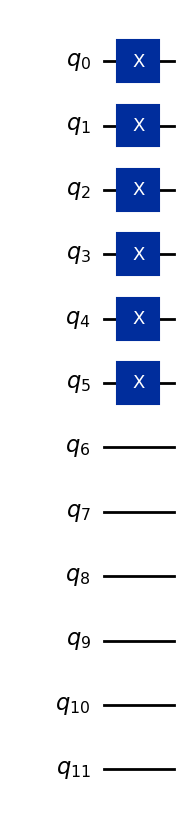

In [5]:
H = fermi_hubbard_model.second_q_op()
Initial_state = QuantumCircuit(12)
Initial_state.x(range(0,6))
InitialState = Statevector(Initial_state)
Initial_state.draw('mpl')

In [6]:
InitialState.data

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [7]:
time_step = 0.01
num_time_steps = 1000
H = fermi_hubbard_model.second_q_op()
mapper =JordanWignerMapper()
H_matrix = mapper.map(H)
H_matrix= H_matrix.to_matrix()
psi_0 = InitialState.data


In [1]:
import openfermion
from openfermion.transforms import jordan_wigner
from openfermion.linalg import get_sparse_operator
import numpy as np
from scipy.sparse.linalg import expm

# 定义费米-哈伯德模型参数
x_dimension = 8
y_dimension = 1
tunneling = 1.0
coulomb = 0.1 * tunneling
chemical_potential = 0.0
magnetic_field = 0.0
periodic = True
spinless = False
particle_hole_symmetry = False

# 生成费米-哈伯德模型的哈密顿量
hamiltonian = openfermion.hamiltonians.fermi_hubbard(
    x_dimension,
    y_dimension,
    tunneling,
    coulomb,
    chemical_potential,
    magnetic_field,
    periodic,
    spinless,
    particle_hole_symmetry
)

# 使用 Jordan-Wigner 变换将费米子哈密顿量转换为量子比特哈密顿量
qubit_hamiltonian = jordan_wigner(hamiltonian)

# 将量子比特哈密顿量转换为稀疏矩阵形式
sparse_hamiltonian = get_sparse_operator(qubit_hamiltonian)

# 定义初态波函数 (例如，基态)
initial_state = np.random.rand(sparse_hamiltonian.shape[0]) + 1j * np.random.rand(sparse_hamiltonian.shape[0])
initial_state /= np.linalg.norm(initial_state)


In [5]:
from openfermion.measurements import get_two_rdm

ImportError: cannot import name 'get_two_rdm' from 'openfermion.measurements' (/opt/miniconda3/envs/QuantumV2/lib/python3.12/site-packages/openfermion/measurements/__init__.py)

$\rho_{ijkl} = \langle \Psi | c_i^\dagger c_j^\dagger c_k c_l | \Psi \rangle $